# Titanic Analysis and Predictions using Machine Learning

I am a newbie to data science and machine learning, and will be attempting to work my way through the Titanic: Machine Learning from Disaster dataset.

## Introduction

In this kernel I will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.

## The RMS Titanic

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

## Data Types

Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

Categorical Features: Survived, Sex, Embarked, Pclass
Alphanumeric Features: Ticket, Cabin

What are the data types for each feature?
Survived: int
Pclass: int
Name: string
Sex: string
Age: float
SibSp: int
Parch: int
Ticket: string
Fare: float
Cabin: string
Embarked: string

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.

## Importing the libraries needed

In [97]:
import pandas as pd
import numpy as np

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the datasets

In [99]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

## Checking the head of training dataset to evaluate the features set

In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
print(train.shape)

(891, 12)


In [102]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
print(test.shape)

(418, 11)


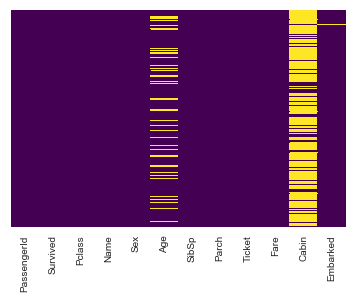

In [104]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [105]:
sns.set_style('whitegrid')

## Some Observations:

There are a total of 891 passengers in our training set.

The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.

The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.

The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

## Plotting Survival by Sex

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


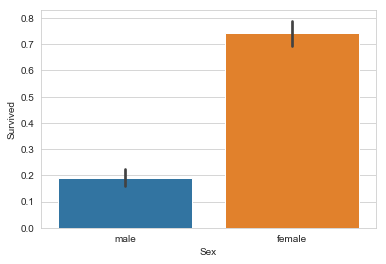

In [106]:
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

## Plotting Survival Rate with the Passenger Class

Here we can see that the majority of the deaths that occurred on the Titanic was in passengers that were in the 3rd Class. This makes sense due to the fact that lifeboats would be less accessible to passengers in the third class. 

The number of survivors is more in the First class of passsengers, who were likely wealthier and had access to the lifeboats.

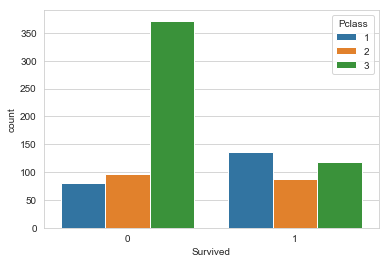

In [107]:
sns.countplot(x='Survived',hue='Pclass',data=train)

## Plotting the Age of Passengers on the Titanic

Here we can see the plot of the age distribution of passengers on the Titanic. We can see the average age on board can be found somewhere around 30. 

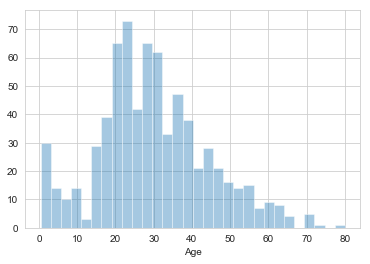

In [108]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

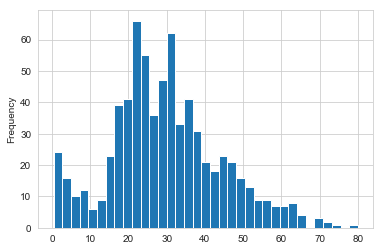

In [109]:
train['Age'].plot.hist(bins=35)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Plotting the number of Siblings on board the Titanic

Here we can see the majority of the passengers on the Titanic did not in-fact have any siblings/Spouses on board. Around 200 of the passengers had one Sibling/Spouse on board. 

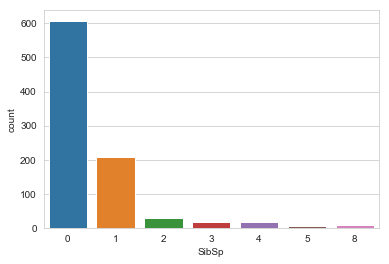

In [111]:
sns.countplot(x='SibSp',data=train)

## Plotting the Fare paid by Titanic passengers

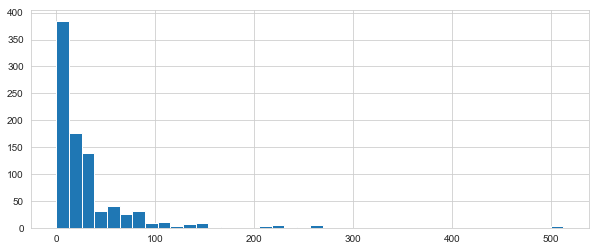

In [112]:
train['Fare'].hist(bins=40,figsize=(10,4))

## Plotting the Age of Passenger with the Passenger Class

Here we are making a boxplot of the average ages of the Passenger classe can be seen. We can see the average age of First Class passengers is near 40, while the Second class passengers is near 30, while Third class passengers are near 25 years old.

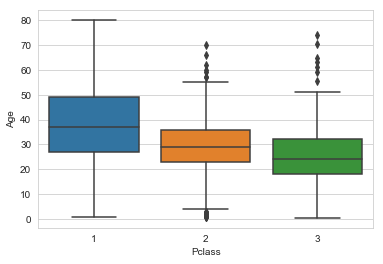

In [113]:
sns.boxplot(x='Pclass',y='Age',data=train)

## Replacing Missing Values in Age

Here we are writing a function to fill in the missing values of age based on the Passenger class of the missing entry. if the Entry is in first class, we get an average of 37, 29 for second class and 24 for third class. Otherwise, we are returning the age mentioned in the dataset. 

In [114]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [115]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now when we check the heatmap again, we can see that the missing values of age have been removed.

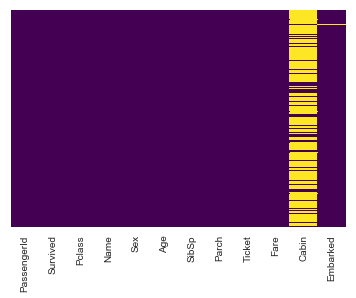

In [116]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, after evaluating the feature set we are dropping the Cabin column, as there are simply far too many empty values to derive any noteworthy conclusion from the field.

In [117]:
train.drop('Cabin',axis=1,inplace=True)

This is the new dataset.

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [119]:
train.dropna(inplace=True)

## Replacing the categorical features with dummy values

Here to derive conclusions from these categorical features, we must replace the Sex, Embark features with binary values 0 and 1 for Sex, and Q and S for Embark. 

Now we concatenate the new columns to the original dataset Train.

In [120]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [121]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [122]:
train = pd.concat([train,sex,embark],axis=1)

This is the new dataset after concatenation.

In [123]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


Here now we are dropping the columns Sex, Embarked due to replacing them with dummy variables. We are also dropping the Name and Ticket columns as they will not be of much help during classification. 

In [124]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [125]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Lastly, we are removing the Passenger ID field, as it does not help us during classification either.

In [126]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [127]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [128]:
X = train.drop('Survived',axis=1)
y = train['Survived']

## Importing Machine Learning Libaries

Here we are importing the required libaries for using the Machine Learning Algorithms. We will be testing this dataset using Random Forest, Decision Trees as well as Logistic Regression. 

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Logistic Regression

In [132]:
logmodel = LogisticRegression()

In [133]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
predictions = logmodel.predict(X_test)

In [136]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [138]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

## Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[138  25]
 [ 32  72]]
             precision    recall  f1-score   support

          0       0.81      0.85      0.83       163
          1       0.74      0.69      0.72       104

avg / total       0.78      0.79      0.79       267



## Random Forest Classifier

In [148]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85       163
          1       0.78      0.73      0.75       104

avg / total       0.81      0.81      0.81       267

[[141  22]
 [ 28  76]]


## Gaussian Naive-Bayes

In [147]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.88      0.85       163
          1       0.79      0.68      0.73       104

avg / total       0.80      0.81      0.80       267

[[144  19]
 [ 33  71]]


## Support Vector Machines

In [149]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.71      0.81      0.76       163
          1       0.62      0.48      0.54       104

avg / total       0.67      0.68      0.67       267

[[132  31]
 [ 54  50]]


## Conclusion

From the algorithms tested, we see that we get the highest possible results with the Random Forest Classification Technique at 82% accuracy. Logistic Regression predicts close to it in accuracy with 81%, with Decision Trees predicting survivors with 78% accuracy.